Generation 1: Best Fitness Score = -2.5304
Generation 2: Best Fitness Score = -2.5304
Generation 3: Best Fitness Score = -2.5304
Generation 4: Best Fitness Score = -2.5304
Generation 5: Best Fitness Score = -2.5304
Generation 6: Best Fitness Score = -2.5304
Generation 7: Best Fitness Score = -2.5304
Generation 8: Best Fitness Score = -2.5304
Generation 9: Best Fitness Score = -2.5304
Generation 10: Best Fitness Score = -2.5304
Generation 11: Best Fitness Score = -2.5304
Generation 12: Best Fitness Score = -2.5304
Generation 13: Best Fitness Score = -2.5304
Generation 14: Best Fitness Score = -2.5304
Generation 15: Best Fitness Score = -2.5304
Generation 16: Best Fitness Score = -2.5304
Generation 17: Best Fitness Score = -2.5304
Generation 18: Best Fitness Score = -2.5304
Generation 19: Best Fitness Score = -2.5304
Generation 20: Best Fitness Score = -2.5304
Generation 21: Best Fitness Score = -2.5304
Generation 22: Best Fitness Score = -2.5304
Generation 23: Best Fitness Score = -2.53

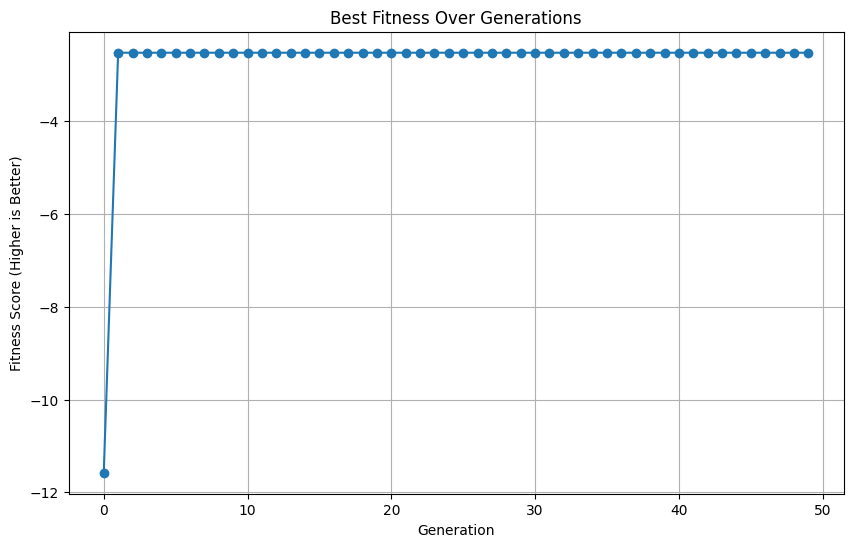

In [5]:
# Import necessary libraries
import numpy as np
import pandas as pd
import joblib
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import random
import matplotlib.pyplot as plt

# Load the trained RSSI prediction model
model_path = 'rssi_prediction_model.pkl'
rssi_model = joblib.load(model_path)

# Load the dataset
data_path = 'data_preprocessed.csv'  # Replace with your data file path
data = pd.read_csv(data_path)

# Prepare the input features for predictions
input_features = data[['reference_point', 'bssid', 'channel', 'xr', 'yr', 'relative_position']]
scaler = RobustScaler()
scaled_features = scaler.fit_transform(input_features)

# Define a fitness function for the genetic algorithm
def fitness_function(individual, model, scaler, data):
    # Modify the data based on the individual's genes (e.g., scale reference point, adjust xr/yr)
    modified_data = data.copy()
    modified_data['reference_point'] *= individual[0]  # Example modification
    modified_data['xr'] += individual[1]  # Example modification
    modified_data['yr'] += individual[2]  # Example modification
    
    # Scale the modified data
    scaled_modified_features = scaler.transform(modified_data[['reference_point', 'bssid', 'channel', 'xr', 'yr', 'relative_position']])
    
    # Predict RSSI values
    predictions = model.predict(scaled_modified_features)
    
    # Evaluate the predictions using actual values
    actual_values = modified_data[['rssi_ap_digilab', 'rssi_ap_dosen']].values
    mse = mean_squared_error(actual_values, predictions)
    return -mse  # Return negative MSE for minimization (we want to maximize fitness)

# Genetic algorithm parameters
population_size = 100
num_generations = 50
mutation_rate = 0.6

# Initialize the population
population = [np.random.uniform(0.5, 1.5, 3) for _ in range(population_size)]  # Example genes: [scale_ref_point, adjust_xr, adjust_yr]

# Main loop for the genetic algorithm
for generation in range(num_generations):
    # Evaluate fitness for each individual
    fitness_scores = [fitness_function(ind, rssi_model, scaler, data) for ind in population]
    
    # Sort individuals by fitness scores (highest score first)
    sorted_indices = np.argsort(fitness_scores)
    top_individuals = [population[i] for i in sorted_indices[-(population_size // 2):]]
    
    # Crossover (create new individuals by combining parts of parents)
    new_population = []
    while len(new_population) < population_size:
        parent1, parent2 = random.sample(top_individuals, 2)
        crossover_point = random.randint(1, 2)
        child = np.concatenate((parent1[:crossover_point], parent2[crossover_point:]))
        new_population.append(child)
    
    # Mutation (apply small changes to individuals)
    for i in range(population_size):
        if random.random() < mutation_rate:
            mutation = np.random.uniform(-0.1, 0.1, 3)  # Small random change
            new_population[i] += mutation
    
    # Replace old population with the new population
    population = new_population
    
    # Print the best fitness score of the current generation
    best_fitness = max(fitness_scores)
    print(f"Generation {generation + 1}: Best Fitness Score = {best_fitness:.4f}")

# Print the best solution found
best_solution = population[np.argmax(fitness_scores)]
print(f"Best solution found: {best_solution}")

# Optionally, plot the best fitness over generations for visualization
plt.figure(figsize=(10, 6))
plt.plot(range(num_generations), [max(fitness_scores[:i+1]) for i in range(num_generations)], marker='o')
plt.title('Best Fitness Over Generations')
plt.xlabel('Generation')
plt.ylabel('Fitness Score (Higher is Better)')
plt.grid(True)
plt.show()
